---

# Linear Regression with Single Neuron and Gradient Descent

In this notebook, we delve into the implementation of a single neuron model coupled with the gradient descent algorithm to tackle the **linear regression problem**. The primary aim is to provide a hands-on exploration of fundamental concepts in linear regression applied to the Palmer Penguin species data.

## Overview

1. **Dataset Description:** We utilize the Palmer Penguin dataset, which contains comprehensive measurements of penguin species attributes.
2. **Model Implementation:** The single neuron model, augmented with a constant activation function, forms the basis for our linear regression approach.
3. **Gradient Descent:** We employ the gradient descent algorithm to iteratively optimize model parameters and minimize the error between predicted and actual values.
4. **Visualization:** Through visualizations, we illustrate the linear regression results, including the learned regression line and its alignment with the penguin species data.


---

In [33]:
# Import standard data science libraries for visualization and data manipulation.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a helpful function for plotting decision boundaries.
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme for aesthetic visualizations.
sns.set_theme()

# Load the Palmer Penguin dataset from the provided CSV file.
df = pd.read_csv('palmer_penguins.csv')

---

### Linear Regression Overview

Linear regression is a widely used technique that assumes a linear relationship between the independent variables (features) and the dependent variable (target). In our case, we assume that the optimal target function for penguin species data is approximately linear.

### Example: Visualizing Linear Relationship

To illustrate the concept of linear regression, let's consider an example using the Palmer Penguin dataset. We will examine the relationship between the bill length and bill depth of Chinstrap penguins. This can be verified by visualizing the data. We can examine the figure generated by running the following code in the cell below.



---

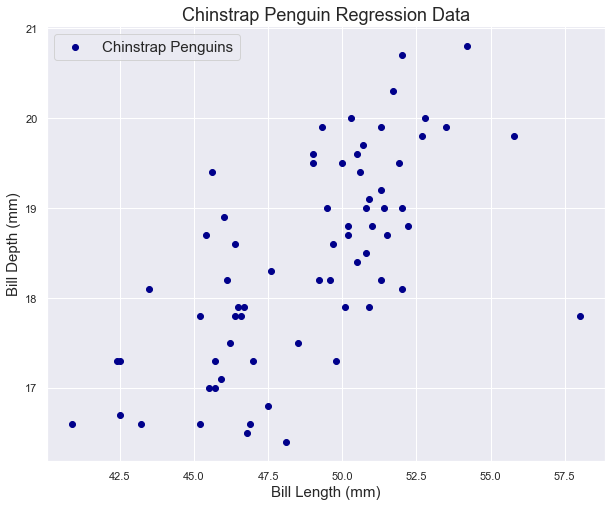

In [34]:
# Import necessary libraries and set the Seaborn theme.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

# Load the Palmer Penguin dataset.
df = pd.read_csv('palmer_penguins.csv')

# Select all rows for the 'Chinstrap' species.
target_data = df[df['species'] == 'Chinstrap'][['bill_length_mm', 'bill_depth_mm']]

# Plot the selected data points for 'Chinstrap' species based on bill measurements.
plt.figure(figsize=(10, 8))
plt.scatter(target_data['bill_length_mm'], 
            target_data['bill_depth_mm'], 
            color='darkblue',  
            label='Chinstrap Penguins')
plt.xlabel('Bill Length (mm)', fontsize=15)
plt.ylabel('Bill Depth (mm)', fontsize=15)
plt.title('Chinstrap Penguin Regression Data', fontsize=18)
plt.legend(fontsize=15)
plt.show()





---

### CustomNeuron Class

The `CustomNeuron` class encapsulates the functionality of a single artificial neuron. Below are the details of the class attributes and methods.

---





In [35]:
class CustomNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    weights_bias_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the fit method is called.

    errors_: list
        A list containing the mean squared error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    __init__(self, activation_function)
        Initializes the CustomNeuron object with the provided activation function.

    fit(self, X, y, alpha=0.005, epochs=50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make predictions.
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def fit(self, X, y, alpha=0.005, epochs=50):
        self.weights_bias_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                error = (self.predict(xi) - target)
                self.weights_bias_[:-1] -= alpha * error * xi
                self.weights_bias_[-1] -= alpha * error
                errors += 0.5 * (error ** 2)
            self.errors_.append(errors / N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.weights_bias_[:-1]) + self.weights_bias_[-1]
        return self.activation_function(preactivation)


---

### Data Preparation

Before training our custom `CustomNeuron` model, we need to format our data appropriately. The following steps outline the data formatting process:

## Quick Data Formatting

To prepare our data for training, we first need to ensure it is properly formatted. Follow the steps outlined below:

1. **Convert to NumPy Arrays:** The first step involves converting the relevant columns of the Palmer Penguin dataset into NumPy arrays. For example, we convert the 'bill_length_mm' column into a NumPy array.

2. **Reshape Feature Vectors:** Single-entry feature vectors must be reshaped using the `reshape(-1, 1)` method. This ensures the correct dimensions required for vector and matrix multiplications.

3. **Convert Labels to NumPy Arrays:** Next, we convert the labels (e.g., 'bill_depth_mm') into NumPy arrays for further processing.

---

In [36]:
# Extract sepal length values from the DataFrame and reshape to a 2D array.
X = target_data['bill_length_mm'].values
X = X.reshape(-1, 1)

# Extract sepal width values from the DataFrame.
y = target_data['bill_depth_mm'].values


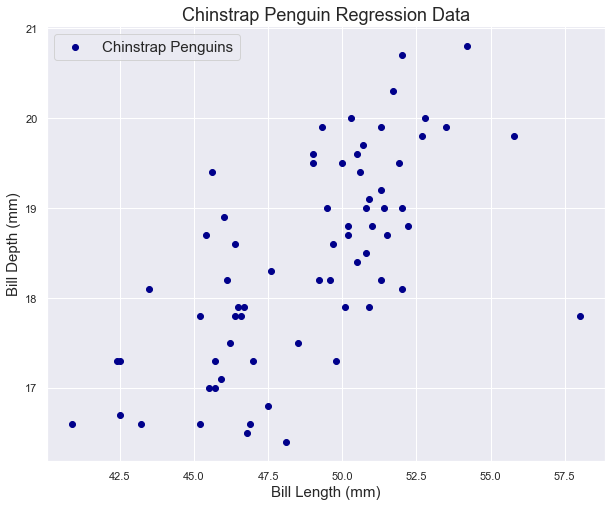

In [37]:
# Plotting the selected features 'bill_length_mm' against 'bill_depth_mm' for Chinstrap penguins.
plt.figure(figsize=(10, 8))
plt.scatter(X, y, color='darkblue', label='Chinstrap Penguins')
plt.xlabel('Bill Length (mm)', fontsize=15)
plt.ylabel('Bill Depth (mm)', fontsize=15)
plt.title('Chinstrap Penguin Regression Data', fontsize=18)  # Corrected title
plt.legend(fontsize=15)
plt.show()


---

### Creating and Training a CustomNeuron Instance

To utilize our custom `CustomNeuron` model, we first need to define an appropriate activation function. Once defined, we can proceed to instantiate a `CustomNeuron` object and train it using our data.

#### Creating and Training an Instance of the `CustomNeuron` Class

To create and train an instance of the `CustomNeuron` model, we follow the steps outlined below:

1. **Define Activation Function:** Begin by defining an activation function suitable for your task. This function will be applied to the preactivation linear combination within the neuron.

2. **Instantiate `CustomNeuron` Object:** Next, instantiate a `CustomNeuron` object by passing the activation function as an argument.

3. **Training the Model:** Train the `CustomNeuron` model using the `train()` method. Provide input feature vectors `X` and associated labels `y` to the method. Additionally, specify optional parameters such as learning rate (`alpha`) and number of epochs (`epochs`). 

---

In [38]:
# Define a constant activation function.
def constant_activation(z):
    return z

# Instantiate a CustomNeuron object with the constant activation function.
neuron = CustomNeuron(constant_activation)

# Train the CustomNeuron model with the provided data.
neuron.fit(X, y, alpha=0.0001, epochs=5)



---

### Visualizing Linear Regression

After creating an instance of the `CustomNeuron` class and training the model using the `fit` method, we can visualize the linear regression line by plotting the original data points and the predicted output over a specified domain.


To visualize the linear regression line, we follow the steps outlined below:

1. **Scatter Plot Data:** Begin by creating a scatter plot of the original data points. This provides a visual representation of the relationship between input features and output labels.

2. **Plot Predictions:** Plot the predicted output over a specified domain within the range of input feature values. This allows us to visualize how well the model fits the data and the trend of the linear regression line.

Ensure that the domain for predicting is properly reshaped, especially when dealing with single measurement features.

---


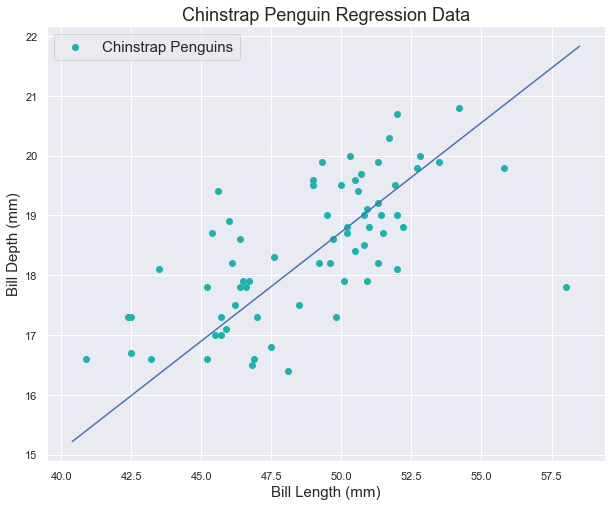

In [39]:
# Define the domain for prediction using the feature 'bill_length_mm'.
domain = np.linspace(np.min(X) - 0.5, np.max(X) + 0.5, 100)

# Plotting the data points and the regression line for 'Chinstrap' penguins.
plt.figure(figsize=(10, 8))
plt.scatter(X, y, color='lightseagreen', label='Chinstrap Penguins')
plt.plot(domain, neuron.predict(domain.reshape(-1, 1)))
plt.xlabel('Bill Length (mm)', fontsize=15)
plt.ylabel('Bill Depth (mm)', fontsize=15)
plt.title('Chinstrap Penguin Regression Data', fontsize=18)
plt.legend(fontsize=15)
plt.show()


---

### Evaluating Model Performance

The line generated by our custom `CustomNeuron` class certainly doesn't appear random! We can verify this by examining the `errors_` attribute that we stored during training. The `errors_` attribute contains the mean squared error of the neuron after each epoch of stochastic gradient descent.

If the mean squared error is decreasing after each epoch, it indicates that our single neuron is learning and we are on the right track!

#### Plotting Mean Squared Error

To assess the performance of our model, we can plot the `errors_` attribute against the number of epochs. This allows us to visualize the trend of mean squared error over the training process and determine if our neuron is indeed learning.

---


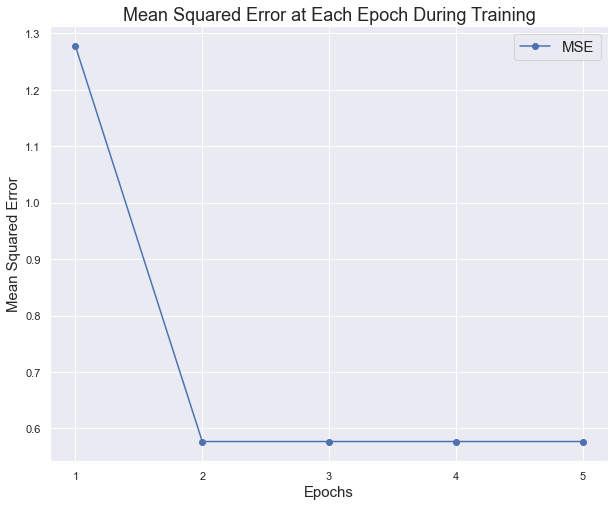

In [40]:
# Create a figure with specified size.
plt.figure(figsize=(10, 8))

# Plot mean squared error against epochs.
plt.plot(range(1, len(neuron.errors_) + 1),  
         neuron.errors_,                    
         marker="o",                      
         label="MSE")                     
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Mean Squared Error", fontsize=15)

# Set x-axis ticks.
plt.xticks(range(1, len(neuron.errors_) + 1))
plt.legend(fontsize=15)
plt.title("Mean Squared Error at Each Epoch During Training", fontsize=18)
plt.show()


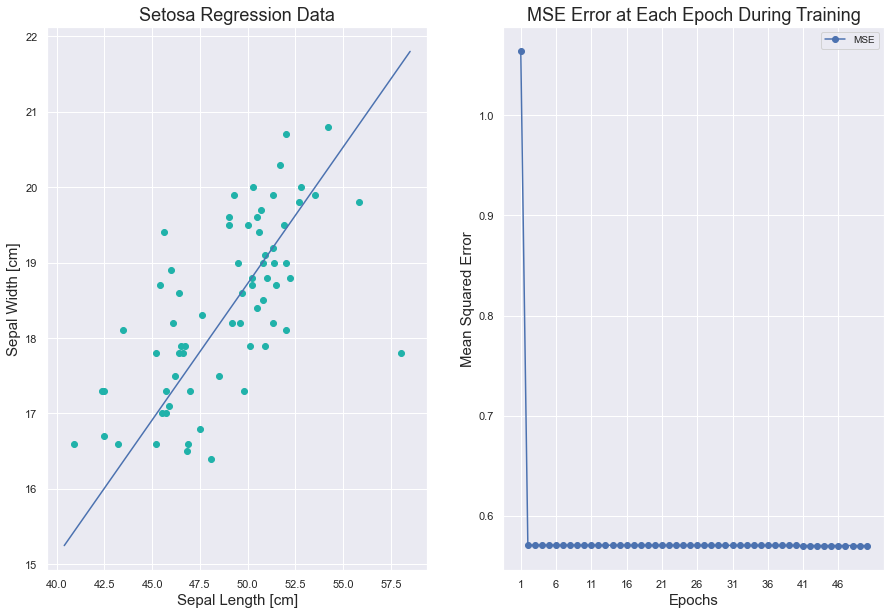

In [41]:
# Instantiate a SingleNeuron object with constant activation function
neuron = CustomNeuron(constant_activation)

# Train the SingleNeuron model over 50 epochs
neuron.fit(X, y, alpha=0.0001, epochs=50)

# Create subplots with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

# Plotting the regression line and original data points
ax1.scatter(X, y, color="lightseagreen")
ax1.plot(domain, neuron.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("Sepal Length [cm]", fontsize=15)
ax1.set_ylabel("Sepal Width [cm]", fontsize=15)
ax1.set_title("Setosa Regression Data", fontsize=18)

# Plotting the mean squared error over each epoch
ax2.plot(range(1, len(neuron.errors_) + 1), neuron.errors_, marker="o", label="MSE")
ax2.set_xlabel("Epochs", fontsize=15)
ax2.set_ylabel("Mean Squared Error", fontsize=15)
ax2.set_xticks(range(1, len(neuron.errors_) + 1, 5))
ax2.legend(fontsize=10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize=18)

plt.show()



<ipython-input-35-0f782e93c9b5>:48: RuntimeWarning: overflow encountered in scalar power
  errors += 0.5 * (error ** 2)
<ipython-input-35-0f782e93c9b5>:46: RuntimeWarning: invalid value encountered in subtract
  self.weights_bias_[:-1] -= alpha * error * xi
<ipython-input-35-0f782e93c9b5>:47: RuntimeWarning: invalid value encountered in scalar subtract
  self.weights_bias_[-1] -= alpha * error
<ipython-input-35-0f782e93c9b5>:48: RuntimeWarning: overflow encountered in scalar power
  errors += 0.5 * (error ** 2)
<ipython-input-35-0f782e93c9b5>:46: RuntimeWarning: overflow encountered in multiply
  self.weights_bias_[:-1] -= alpha * error * xi
<ipython-input-35-0f782e93c9b5>:46: RuntimeWarning: invalid value encountered in subtract
  self.weights_bias_[:-1] -= alpha * error * xi
<ipython-input-35-0f782e93c9b5>:48: RuntimeWarning: overflow encountered in scalar power
  errors += 0.5 * (error ** 2)
<ipython-input-35-0f782e93c9b5>:46: RuntimeWarning: invalid value encountered in subtract
  

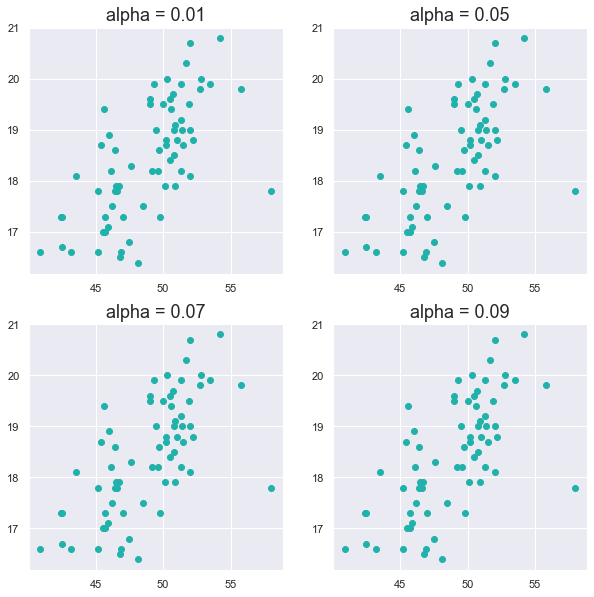

In [42]:
# Some choices of learning rate. 
alphas = [0.01, 0.05, 0.07, 0.09]

domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)

# Call the subplots method for plotting a grid of figures.
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values.
for ax, alpha in zip(axs.flat, alphas):
    # Instantiate a CustomNeuron object with constant activation function.
    neuron = CustomNeuron(constant_activation)
    
    # Train the CustomNeuron model with the current learning rate and a fixed number of epochs.
    neuron.fit(X, y, alpha=alpha, epochs=1000)
    
    # Plot the regression line.
    ax.plot(domain, neuron.predict(domain.reshape(-1, 1)))
    
    # Plot the original data points.
    ax.scatter(X, y, color="lightseagreen")
    
    # Set the title of the subplot with the current learning rate.
    ax.set_title(f"alpha = {alpha}", fontsize=18)
